In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # 导入 pyplot 模块并重命名为 plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# US Accidents Exploratory Data Analysis

Dataset Details - 
1. This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from February 2016 to March 2023. The dataset currently contains approximately 7.7 million accident records.
2. The dataset contains over 40 columns with data ranging from the severity, start and end time of accident to city, county of the accident.
3. It also provides information about the weather condition and road condition along with a description of the accident.

Goal - 
1. Analyse the average resolution time for accidents.
2. Idenitfy the states with the highest number of accidents. What about most accidents of high severity?
3. Analyse impact of weather conditions on no of accidents.
4. Determine the time of days with most frequent accidents.
5. Visualize the year on year trend of no of accidents.

## Setup Dataset as DataFrame

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r'D:\zhuomianshangdedawu\US_Accidents_March23_sampled_500k\US_Accidents_March23_sampled_500k.csv')


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-4694324,Source1,2,2022-12-03 23:37:14.000000000,2022-12-04 01:56:53.000000000,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-5006183,Source1,2,2022-08-20 13:13:00.000000000,2022-08-20 15:22:45.000000000,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,False,True,False,Day,Day,Day,Day
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,False,Night,Night,Night,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,...,False,False,False,False,False,False,Night,Day,Day,Day
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,...,False,False,False,False,False,False,Day,Day,Day,Day
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,...,False,False,False,False,True,False,Night,Night,Day,Day
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day


## Perform Data Preparation and Cleaning

- Look at dataframe details.
- Identify and correct invalid or NA values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     500000 non-null  object 
 1   Source                 500000 non-null  object 
 2   Severity               500000 non-null  int64  
 3   Start_Time             500000 non-null  object 
 4   End_Time               500000 non-null  object 
 5   Start_Lat              500000 non-null  float64
 6   Start_Lng              500000 non-null  float64
 7   End_Lat                279623 non-null  float64
 8   End_Lng                279623 non-null  float64
 9   Distance(mi)           500000 non-null  float64
 10  Description            499999 non-null  object 
 11  Street                 499309 non-null  object 
 12  City                   499981 non-null  object 
 13  County                 500000 non-null  object 
 14  State                  500000 non-nu

In [5]:
df.nunique()
# can use source, severity as category

ID                       500000
Source                        3
Severity                      4
Start_Time               487027
End_Time                 493821
Start_Lat                368965
Start_Lng                370195
End_Lat                  220333
End_Lng                  221463
Distance(mi)              10627
Description              408146
Street                    88272
City                       9488
County                     1606
State                        49
Zipcode                  127804
Country                       1
Timezone                      4
Airport_Code               1878
Weather_Timestamp        255623
Temperature(F)              712
Wind_Chill(F)               797
Humidity(%)                 100
Pressure(in)                980
Visibility(mi)               65
Wind_Direction               24
Wind_Speed(mph)              95
Precipitation(in)           175
Weather_Condition           108
Amenity                       2
Bump                          2
Crossing

In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,279623.000000,279623.000000,500000.000000,489534.000000,370983.000000,488870.000000,491072.000000,488709.000000,463013.000000,357384.000000
mean,2.212748,36.206421,-94.736583,36.273192,-95.776553,0.564317,61.646254,58.229028,64.834921,29.536621,9.091540,7.681347,0.008289
std,0.486661,5.071411,17.405761,5.265333,18.120211,1.774872,19.000133,22.352246,22.826158,1.008666,2.708083,5.431361,0.101865
min,1.000000,24.562117,-124.497420,24.570110,-124.497419,0.000000,-77.800000,-53.200000,1.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,33.416823,-117.233047,33.474773,-117.778324,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.832147,-87.794365,36.192669,-88.039013,0.029000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.082443,-80.359601,40.181341,-80.252449,0.465000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,48.999569,-67.484130,48.998901,-67.484130,193.479996,207.000000,207.000000,100.000000,38.440000,130.000000,822.800000,10.130000


In [7]:
# Getting count of numeric columns i9n dataset
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

13

<Axes: >

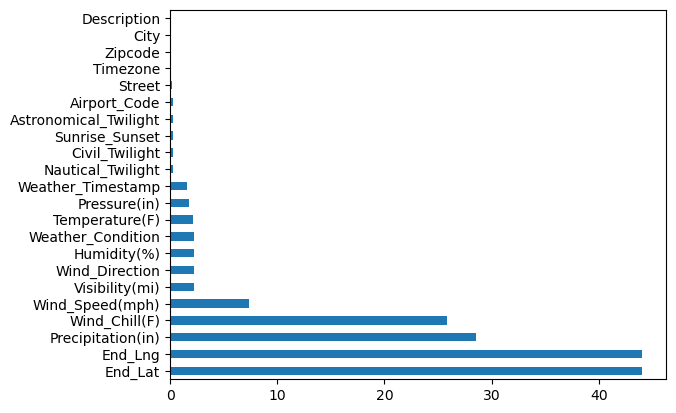

In [8]:
# Percent of missing values per column
percent_missing = df.isnull().sum().sort_values(ascending = False) * 100 / len(df)
percent_missing[percent_missing!= 0].plot(kind = 'barh')

# Usually columns with greater then 50% missing percent can be dropped.

## Perform Exploratory Analysis and Visualization

### Columns to analyse 
- Start_Time 
- End_Time
- State
- Severity
- Weather_Condition

### Relations to Visualize
- Accidents per State
- Accidents by Severity per State
- Accidents by Weather Condition
- Average Resolution Time based on Severity of accidents
- Year on Year Trend of no of accidents

### Analyze State

In [9]:
states = df.State.unique()
len(states) # output - 49
states_by_accidents = df.State.value_counts().reset_index(name='Count')
# states_by_accidents.sort_values('Count', ascending = False)
states_by_accidents.head()

,State,Count
0,CA,113274
1,FL,56710
2,TX,37355
3,SC,24737
4,NY,22594


In [10]:
high_accident_states = states_by_accidents[states_by_accidents['Count'] >=  states_by_accidents['Count'].quantile(0.9)]
print(len(high_accident_states))
low_accident_states = states_by_accidents[states_by_accidents['Count'] < states_by_accidents['Count'].quantile(0.4)]
print(len(low_accident_states))

percent_high_acc_states = len(high_accident_states) * 100 / len(states)
percent_high_acc_states

5
20


10.204081632653061

#### Visualize - Accidents per State

<Axes: xlabel='No of Accidents', ylabel='State'>

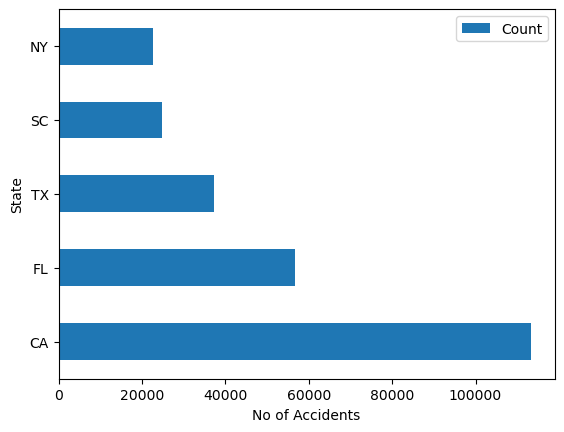

In [11]:
states_by_accidents.head(5).plot(kind='barh',x = 'State', y = 'Count', xlabel='No of Accidents')

#### Visualize - Accidents per State (Seaborn)

<Axes: xlabel='Count', ylabel='State'>

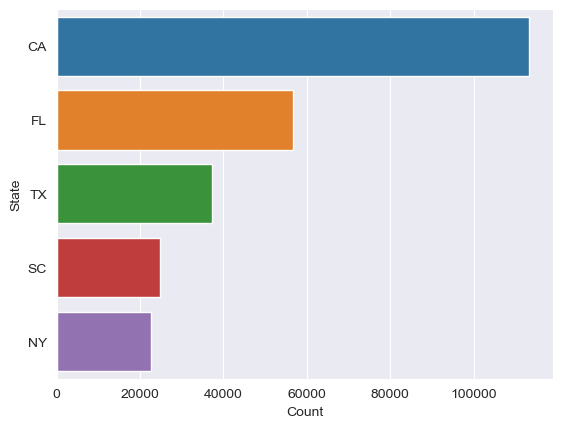

In [12]:
sns.set_style(style = 'darkgrid')
sns.barplot(states_by_accidents.head(5), y='State', x='Count')

### Analyze States and Severity

In [13]:
groupedby_states_severity = df.groupby(by=['Severity', 'State']).size().reset_index(name='Count')
groupedby_states_severity.sort_values(['Severity', 'Count'], ascending = [False, False])

,Severity,State,Count
180,4,VA,1123
173,4,PA,1008
140,4,CA,866
145,4,FL,825
146,4,GA,796
...,...,...,...
10,1,IA,4
24,1,NH,4
21,1,MS,3
13,1,KS,2


#### Visualize - Accidents by Severity per State

<Axes: xlabel='Count', ylabel='State'>

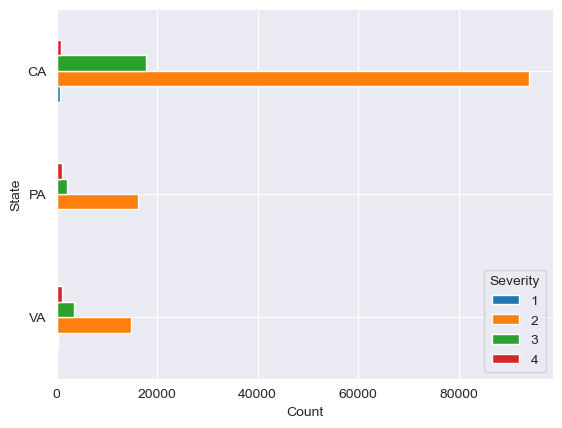

In [14]:
'''
.pivot(index='State', columns='Severity', values='counts'): This reshapes the DataFrame to have states as the index, severity levels as the columns, and counts as the values.
.plot(kind='bar'): This generates a bar plot with the reshaped DataFrame
'''
pivoted_states_severity = groupedby_states_severity.pivot(index='State', columns='Severity', values='Count')
# Showing states with highest number of high severity accidents
pivoted_states_severity.sort_values([4,3,2,1], ascending = False).head(3).plot(kind='barh', xlabel='Count')

#### Visualize - Accidents by Severity per State (Seaborn)

<Axes: xlabel='State'>

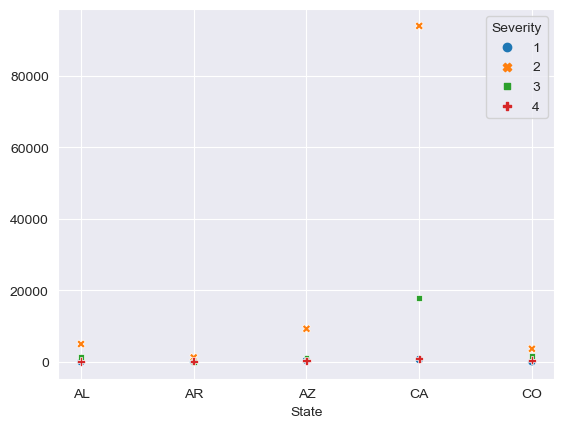

In [15]:
sns.scatterplot(pivoted_states_severity.head(5))

### Analyse Weather Conditions

In [16]:
weather_conditions = df['Weather_Condition'].unique()
weather_conditions_accidents = df['Weather_Condition'].value_counts().reset_index(name='Count')
weather_conditions_accidents.head(5)

,Weather_Condition,Count
0,Fair,166053
1,Mostly Cloudy,65398
2,Cloudy,53107
3,Clear,52379
4,Partly Cloudy,45125


#### Visualize - Accidents by Weather Conditions

<Axes: xlabel='Count', ylabel='Weather'>

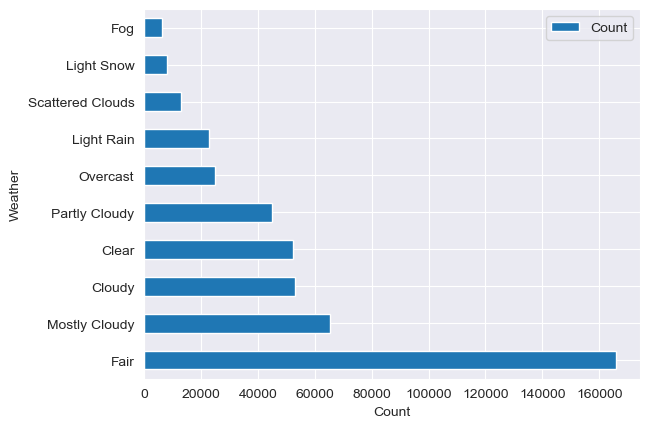

In [17]:
weather_conditions_accidents.head(10).plot(kind ='barh', x='Weather_Condition', y='Count', ylabel='Weather', xlabel='Count')
# , x='Weather_Condition', y='Count'

#### Visualize - Accidents by Weather Conditions (Seaborn)

<Axes: xlabel='Count', ylabel='Weather_Condition'>

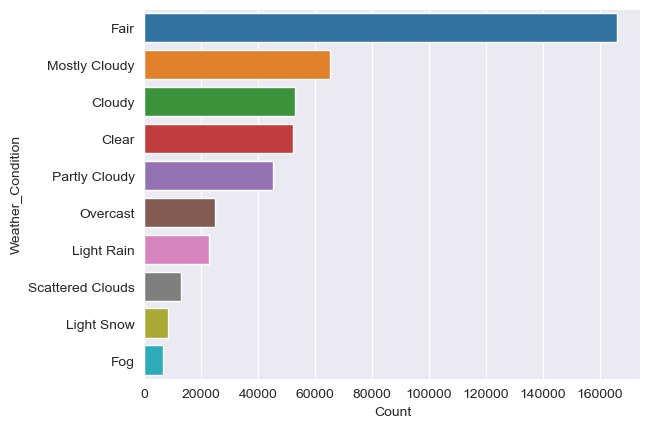

In [18]:
sns.barplot(weather_conditions_accidents.head(10), x='Count', y='Weather_Condition')

### Analyze Start_Time and End_Time

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed')
df['Resolution_Time'] = (df['End_Time'] - df['Start_Time']) / pd.Timedelta(hours=1)
df
# resolution_time = resolution_time / pd.Timedelta(hours=1)
# resolution_time.sample(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Resolution_Time
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,False,True,False,Day,Day,Day,Day,0.750556
1,A-4694324,Source1,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,False,Night,Night,Night,Night,2.327500
2,A-5006183,Source1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,False,True,False,Day,Day,Day,Day,2.162500
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,False,Day,Day,Day,Day,2.005278
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,False,Night,Night,Night,Night,2.452500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,...,False,False,False,False,False,Night,Day,Day,Day,0.341667
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,...,False,False,False,False,False,Day,Day,Day,Day,1.260278
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,...,False,False,False,True,False,Night,Night,Day,Day,2.087500
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,...,False,False,False,True,False,Day,Day,Day,Day,0.500000


In [20]:
resolution_time_severity= df.groupby('Severity')['Resolution_Time'].mean()
resolution_time_severity

Severity
1     0.765973
2     7.633767
3     1.284505
4    27.943797
Name: Resolution_Time, dtype: float64

#### Visualize - Average Resolution Time

<Axes: xlabel='Time(Hours)', ylabel='Severity'>

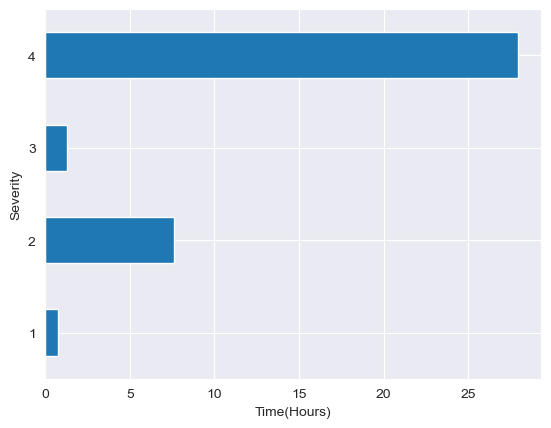

In [21]:
resolution_time_severity.plot(kind='barh', x='Resolution_Time', y='Severity', xlabel='Time(Hours)')

#### Visualize - Average Resolution Time (Seaborn)

D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Severity', ylabel='Resolution_Time'>

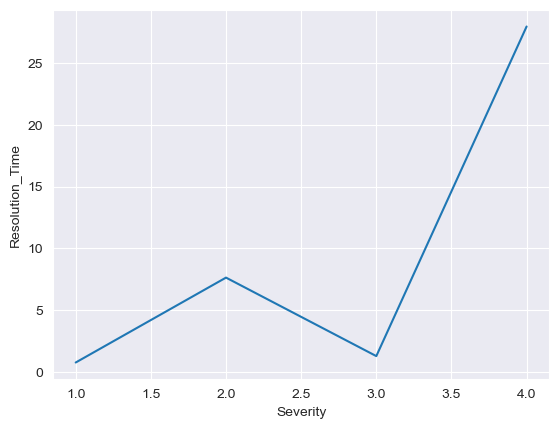

In [22]:
sns.lineplot(resolution_time_severity)

### Analyze Start Time to answer - What time of the days have most accidents occured?

In [23]:
hour_counts = pd.to_datetime(df['Start_Time']).dt.hour.value_counts().sort_index().reset_index(name='Count')
hour_counts.columns = ['Hour', 'Counts']

#### Visualize accidents across the hours of the day

<Axes: xlabel='Time Of Day'>

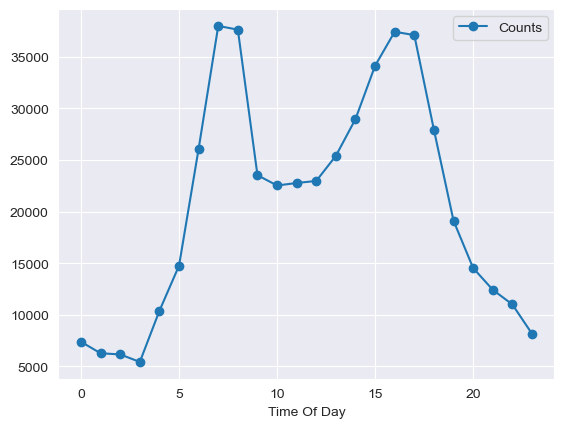

In [24]:
hour_counts.plot(kind='line', x='Hour', y='Counts', marker='o', xlabel='Time Of Day')

#### Visualize accidents across the hours of the day (Seaborn)

D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Hour', ylabel='Counts'>

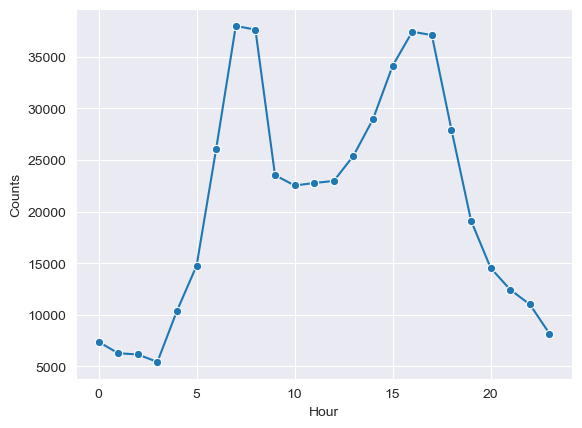

In [25]:
sns.lineplot(x='Hour', y='Counts', marker='o', data=hour_counts)

### Analyze Start Time to derive Year on Year trend

In [26]:
df['Year_Of_Accident'] = pd.to_datetime(df['Start_Time']).dt.year
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Resolution_Time,Year_Of_Accident
0,A-2047758,Source2,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,NaN,NaN,0.000,...,False,False,True,False,Day,Day,Day,Day,0.750556,2019
1,A-4694324,Source1,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,38.990037,-77.398282,0.056,...,False,False,False,False,Night,Night,Night,Night,2.327500,2022
2,A-5006183,Source1,2,2022-08-20 13:13:00,2022-08-20 15:22:45,34.661189,-120.492822,34.661189,-120.492442,0.022,...,False,False,True,False,Day,Day,Day,Day,2.162500,2022
3,A-4237356,Source1,2,2022-02-21 17:43:04,2022-02-21 19:43:23,43.680592,-92.993317,43.680574,-92.972223,1.054,...,False,False,False,False,Day,Day,Day,Day,2.005278,2022
4,A-6690583,Source1,2,2020-12-04 01:46:00,2020-12-04 04:13:09,35.395484,-118.985176,35.395476,-118.985995,0.046,...,False,False,False,False,Night,Night,Night,Night,2.452500,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-6077227,Source1,2,2021-12-15 07:30:00,2021-12-15 07:50:30,45.522510,-123.084104,45.520225,-123.084211,0.158,...,False,False,False,False,Night,Day,Day,Day,0.341667,2021
499996,A-6323243,Source1,2,2021-12-19 16:25:00,2021-12-19 17:40:37,26.702570,-80.111169,26.703141,-80.111133,0.040,...,False,False,False,False,Day,Day,Day,Day,1.260278,2021
499997,A-3789256,Source1,2,2022-04-13 19:28:29,2022-04-13 21:33:44,34.561862,-112.259620,34.566822,-112.267150,0.549,...,False,False,True,False,Night,Night,Day,Day,2.087500,2022
499998,A-7030381,Source1,3,2020-05-15 17:20:56,2020-05-15 17:50:56,38.406680,-78.619310,38.406680,-78.619310,0.000,...,False,False,True,False,Day,Day,Day,Day,0.500000,2020


#### Visualize Year on Year trend

<Axes: xlabel='Year_Of_Accident', ylabel='Count'>

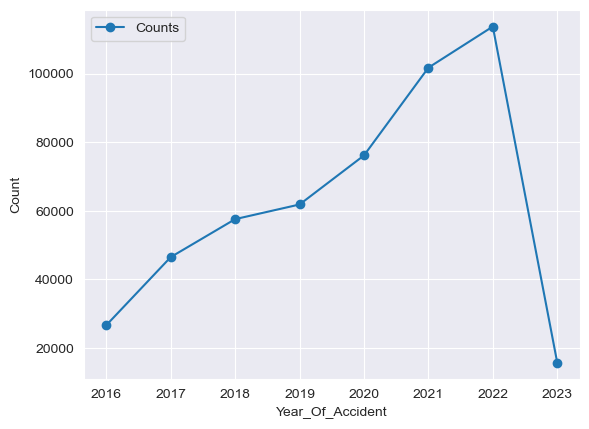

In [27]:
year_counts = df['Year_Of_Accident'].value_counts().sort_index().reset_index(name='Counts')
year_counts
year_counts.columns = ['Year_Of_Accident', 'Counts']
year_counts.plot(kind='line', x='Year_Of_Accident', y='Counts', marker='o', ylabel='Count')

#### Visualize Year on Year trend (Seaborn)

D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year_Of_Accident', ylabel='Counts'>

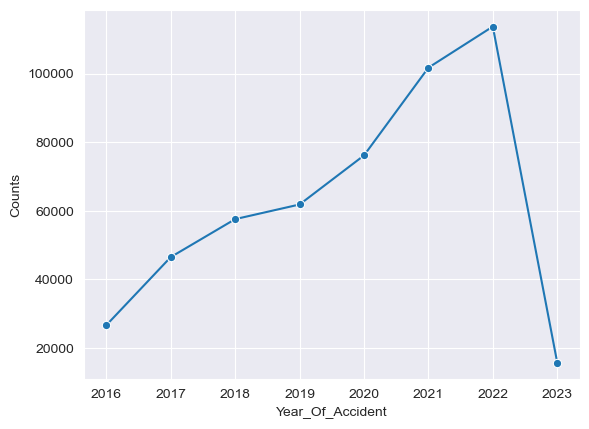

In [28]:
sns.lineplot(x='Year_Of_Accident', y='Counts', marker='o', data=df['Year_Of_Accident'].value_counts(ascending = True).reset_index(name='Counts'))

In [29]:
df['Start_Time'].astype('object')

0         2019-06-12 10:10:56
1         2022-12-03 23:37:14
2         2022-08-20 13:13:00
3         2022-02-21 17:43:04
4         2020-12-04 01:46:00
                 ...         
499995    2021-12-15 07:30:00
499996    2021-12-19 16:25:00
499997    2022-04-13 19:28:29
499998    2020-05-15 17:20:56
499999    2022-04-02 23:23:13
Name: Start_Time, Length: 500000, dtype: object

In [30]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

In [31]:
df['years'] = df['Start_Time'].dt.year
df['months'] = df['Start_Time'].dt.month
df['days'] = df['Start_Time'].dt.day
df['hours'] = df['Start_Time'].dt.hour


df['count'] = df.groupby(['years', 'months', 'Street'])['years'].transform('count')

In [34]:
data_years_months_days_street = df.groupby(['years', 'months', 'Street'], as_index=False)['count'].sum()
data_years_months_days_street = data_years_months_days_street.sort_values(by='count', ascending=False)
data_years_months_days_street = data_years_months_days_street.iloc[:500, :]
data_years_months_days_street

,years,months,Street,count
150060,2020,10,I-95 S,39601.0
156101,2020,11,I-95 S,29929.0
162152,2020,12,I-95 S,24964.0
241830,2022,4,I-95,21316.0
156100,2020,11,I-95 N,20164.0
...,...,...,...,...
38249,2017,10,I-75 S,1369.0
225805,2022,1,I-5 N,1369.0
155478,2020,11,Florida's Tpke S,1369.0
236207,2022,3,I-90 W,1369.0


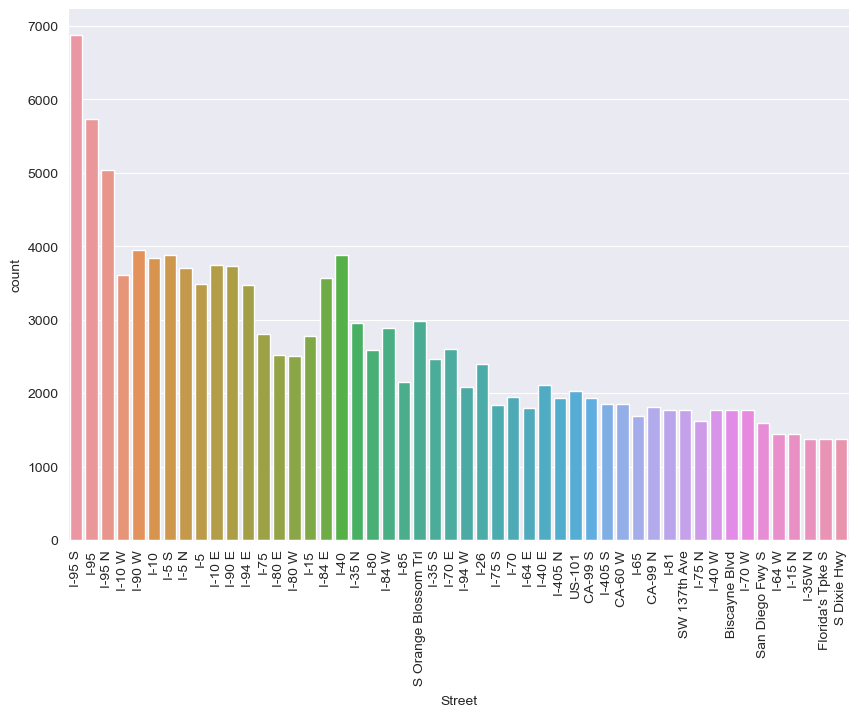

In [37]:
sns.catplot(kind='bar', data=data_years_months_days_street, x='Street', y='count', errorbar=None,height=6, aspect=1.5)
plt.xticks(rotation=90)
plt.show()

In [43]:
data_years_months_days_corr_weather = df.groupby(['years','months','State'])[['Wind_Speed(mph)','Temperature(F)','Humidity(%)','Visibility(mi)']].mean().reset_index()
data_years_months_days_corr_weather 

,years,months,State,Wind_Speed(mph),Temperature(F),Humidity(%),Visibility(mi)
0,2016,1,PA,3.000000,31.000000,69.000000,10.000000
1,2016,2,IN,21.300000,33.816667,86.166667,3.666667
2,2016,2,OH,10.204762,30.614894,76.765957,6.761702
3,2016,2,PA,7.620000,20.800000,74.000000,8.600000
4,2016,3,CA,9.324878,60.784211,53.016194,9.947368
...,...,...,...,...,...,...,...
3718,2023,3,TX,9.898876,64.500000,60.077778,8.800000
3719,2023,3,VA,5.875000,58.625000,51.550000,9.150000
3720,2023,3,WA,8.666667,49.366667,62.566667,9.766667
3721,2023,3,WI,10.150000,36.500000,70.300000,6.137500


D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

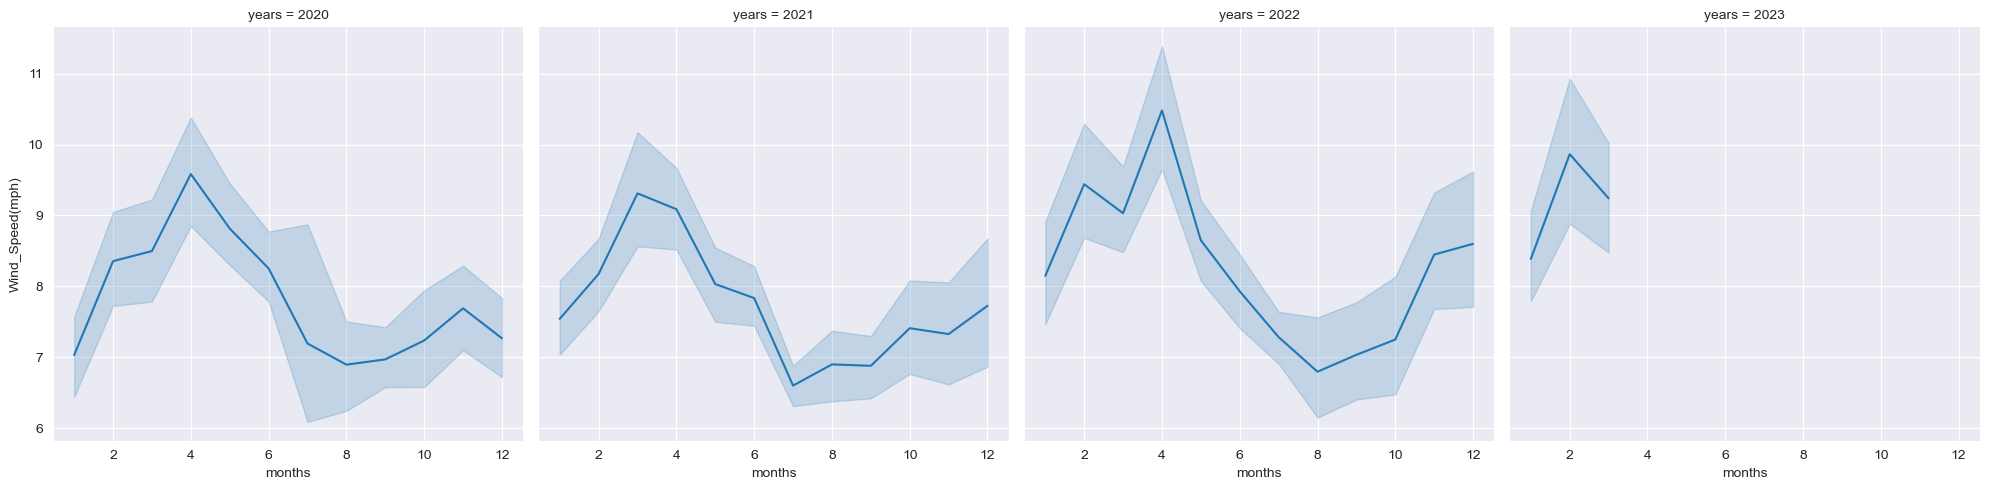

In [50]:
data_years_months_days_corr_weather.replace([np.inf, -np.inf], np.nan, inplace=True)
data_years_months_days_20_23_corr_weather = data_years_months_days_corr_weather[data_years_months_days_corr_weather['years'].isin([2020,2021,2022,2023])]
sns.relplot(kind='line', data=data_years_months_days_20_23_corr_weather,col='years', x='months',y='Wind_Speed(mph)')
plt.show()

## Ask & Answer questions about the data

1. Which states has the highest number of accidents?
2. What is the average resolution time for accidents based on severity.
3. Idenitfy the states with the highest number of high severity accidents.
4. Do weather conditions have an impact on no of accidents?
5. What time of the day are the accidents most frequent in?
6. Year on Year accident trend

## Summary and Conclusion

### Insights:

- Only around 6% states havea total of more than half a million accidents between the years 2016-2023.
- Top 5 States with most accidents are CA, FL, TX, SC, NY, whereas the states with most accidents with high severity are VA, PA, CA
- The average resolution time in hours for accidents based on severity is 1 ~ 1 hour, 2 ~ 8 hours, 3 ~ 1.25 hours, 4 ~ 28 hours
- Based on the distribution across different weather conditions, we can see most accidents happened during Fair, Cloudy or Overcast weather with Fair being at the top. Hence we can conclude no high impact of weather conditions on no of accidents
- Most no of accidents seems to happen during the hours 5am to 10am and 3pm to 5pm, so the morning office hours could be the reason for high no of morning accidents.
- The year on year trend of no of accidents shows a sharp increase during years 2019 to 2022. The sharp decline in 2023 could also point to some missing data.